<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)
import support_preprocesing as sp 
import soporte_clustering as sc
import pickle

# Visualización de gráficos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import KNNImputer

# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
# import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("../data/WrestlingWorldTournament.csv",index_col=0)

In [3]:
sp.exploracion_basica_dataframe(df)

El número de datos es 500 y el de columnas es 14

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 0

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


,count,% unique
name,500,100.0
rank,500,100.0
height,83,16.6
weight,53,10.6
year_start,33,6.6
sports,31,6.2
age,30,6.0
hours_per_day,9,1.8
strength,9,1.8
nationality,8,1.6


Las columnas con más del 50% de valores unicos son:
name
rank

 ------------------------------- 

Las columnas con solo 1 valor único son:

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


,count,% nulos


Las columnas con más del 50% de valores nulos son:

 ------------------------------- 

Los tipos de las columnas son:


,tipo_dato
name,object
gender,object
age,int64
height,float64
nationality,object
weight,int64
sports,object
hours_per_day,int64
strength,int64
agility,int64



 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


,columna
0,name
1,gender
2,nationality
3,sports
4,federation



 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


,columna
0,age
1,height
2,weight
3,hours_per_day
4,strength
5,agility
6,mental
7,year_start
8,rank



 ------------------------------- 

La columna NAME tiene las siguientes valore únicos:


,count,porcentaje (%)
name,,
Zenaida Flagge,1,0.2
Aaron Peavy,1,0.2
Abe Rutland,1,0.2
Adrian Quinn,1,0.2
Viola Lonergan,1,0.2
...,...,...
Alfred Ray,1,0.2
Alexander Bracamonte,1,0.2
Alexander Boone,1,0.2



 ------------------------------- 

La columna GENDER tiene las siguientes valore únicos:


,count,porcentaje (%)
gender,,
Female,265,53.0
Male,235,47.0



 ------------------------------- 

La columna NATIONALITY tiene las siguientes valore únicos:


,count,porcentaje (%)
nationality,,
France,118,23.6
Japan,116,23.2
USA,115,23.0
Australia,64,12.8
Egypt,42,8.4
England,26,5.2
Argentina,12,2.4
India,7,1.4



 ------------------------------- 

La columna SPORTS tiene las siguientes valore únicos:


,count,porcentaje (%)
sports,,
Karate,42,8.4
MMA,34,6.8
Boxing,33,6.6
"Boxing, MMA",31,6.2
Judo,29,5.8
"Boxing, Karate",26,5.2
"Kick-Boxing, MMA",22,4.4
"Boxing, Kick-Boxing, MMA",21,4.2
"Boxing, Kick-Boxing",20,4.0



 ------------------------------- 

La columna FEDERATION tiene las siguientes valore únicos:


,count,porcentaje (%)
federation,,
Fight Zone Wrestling,206,41.2
Consejo Global de Lucha Libre,192,38.4
World Wrestling Entertainment,102,20.4



 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna AGE tiene las siguientes valore únicos:


,count,porcentaje (%)
age,,
32,40,8.0
30,36,7.2
33,35,7.0
29,34,6.8
35,33,6.6
34,33,6.6
31,32,6.4
27,30,6.0
28,28,5.6



 ------------------------------- 

La columna HEIGHT tiene las siguientes valore únicos:


,count,porcentaje (%)
height,,
173.0,14,2.8
170.0,13,2.6
178.0,13,2.6
166.5,13,2.6
173.5,12,2.4
...,...,...
195.0,1,0.2
152.0,1,0.2
192.5,1,0.2



 ------------------------------- 

La columna WEIGHT tiene las siguientes valore únicos:


,count,porcentaje (%)
weight,,
86,24,4.8
92,22,4.4
79,20,4.0
82,18,3.6
84,18,3.6
87,18,3.6
90,17,3.4
93,16,3.2
89,15,3.0



 ------------------------------- 

La columna HOURS_PER_DAY tiene las siguientes valore únicos:


,count,porcentaje (%)
hours_per_day,,
3,132,26.4
2,120,24.0
4,112,22.4
5,57,11.4
1,51,10.2
6,15,3.0
0,10,2.0
7,2,0.4
8,1,0.2



 ------------------------------- 

La columna STRENGTH tiene las siguientes valore únicos:


,count,porcentaje (%)
strength,,
6,124,24.8
7,103,20.6
5,87,17.4
8,74,14.8
4,61,12.2
9,27,5.4
3,17,3.4
10,4,0.8
2,3,0.6



 ------------------------------- 

La columna AGILITY tiene las siguientes valore únicos:


,count,porcentaje (%)
agility,,
7,139,27.8
8,109,21.8
6,96,19.2
9,63,12.6
5,48,9.6
10,28,5.6
4,15,3.0
3,2,0.4



 ------------------------------- 

La columna MENTAL tiene las siguientes valore únicos:


,count,porcentaje (%)
mental,,
7,152,30.4
6,152,30.4
8,92,18.4
5,58,11.6
9,29,5.8
4,10,2.0
10,6,1.2
3,1,0.2



 ------------------------------- 

La columna YEAR_START tiene las siguientes valore únicos:


,count,porcentaje (%)
year_start,,
2007,35,7.0
2003,33,6.6
2009,30,6.0
2006,30,6.0
2005,29,5.8
2010,28,5.6
2004,28,5.6
2012,28,5.6
2008,28,5.6



 ------------------------------- 

La columna RANK tiene las siguientes valore únicos:


,count,porcentaje (%)
rank,,
92,1,0.2
42,1,0.2
161,1,0.2
153,1,0.2
477,1,0.2
...,...,...
260,1,0.2
36,1,0.2
418,1,0.2



 ------------------------------- 



A la vista de los datos procedemos a realizar el preprocesing

In [4]:
df.head(1)

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42


In [5]:
columnas_categonum=sp.detector_columnas_categoricas(df,7)
columnas_categonum

[]

In [6]:
df[columnas_categonum] = df[columnas_categonum].astype(object)

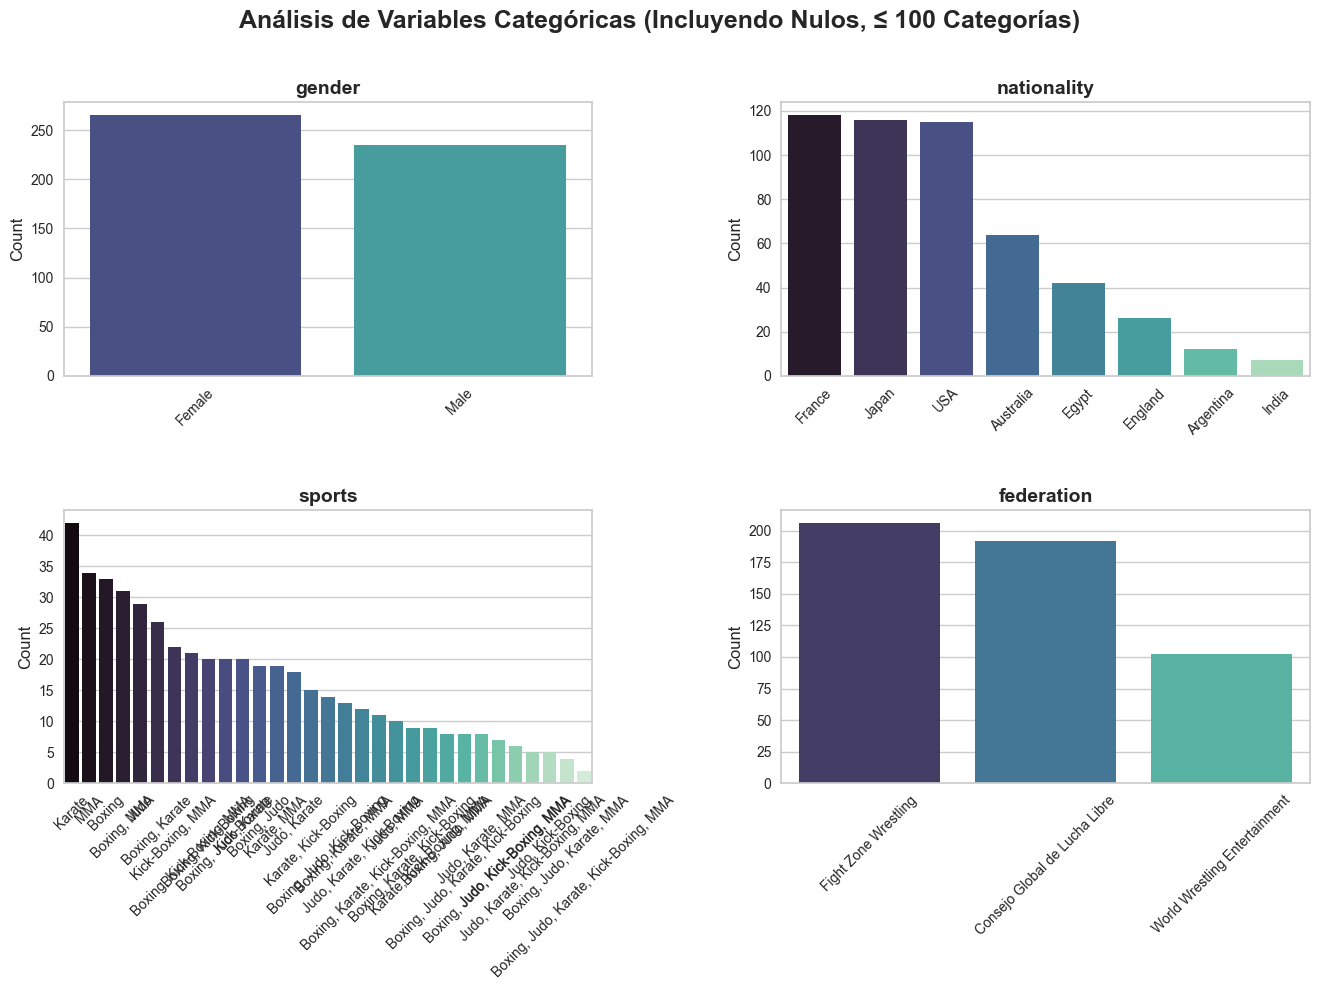

In [7]:
sp.plot_categoricas(df,max_categories=100) 

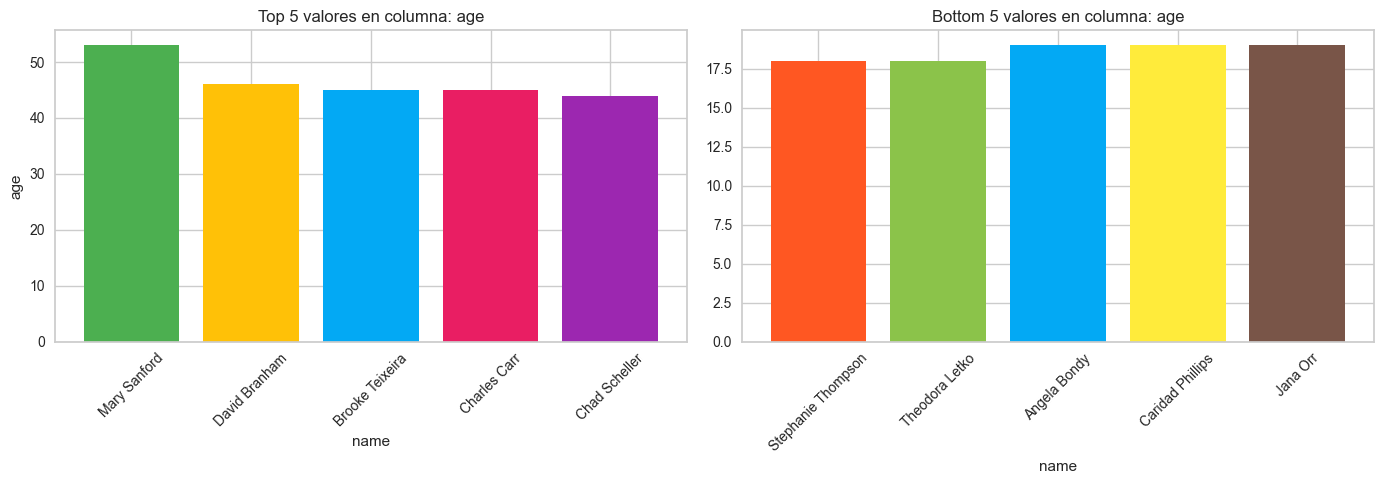

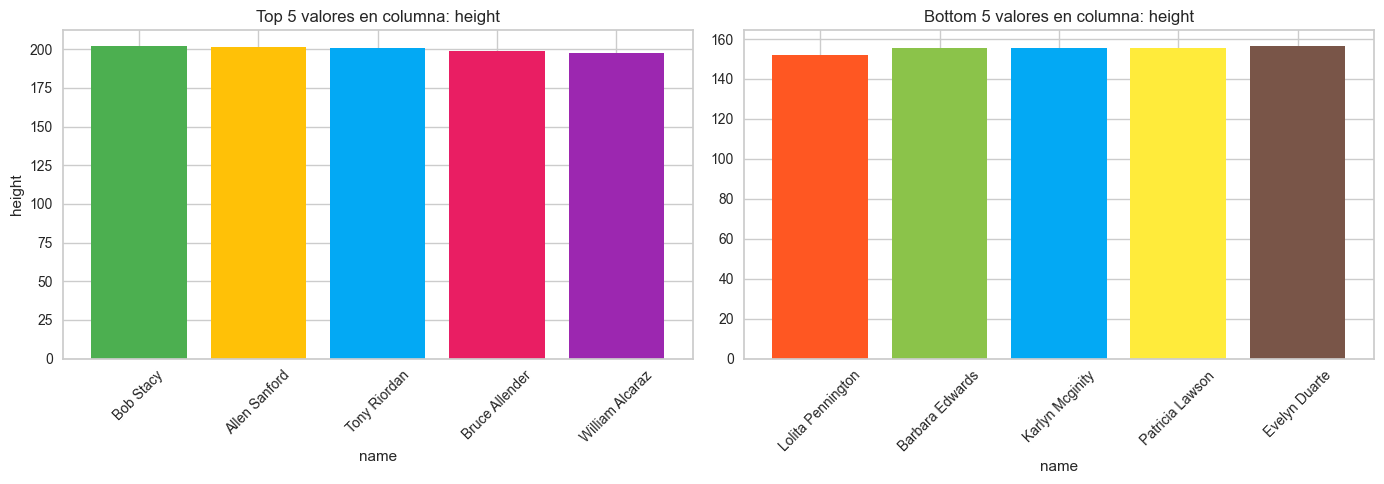

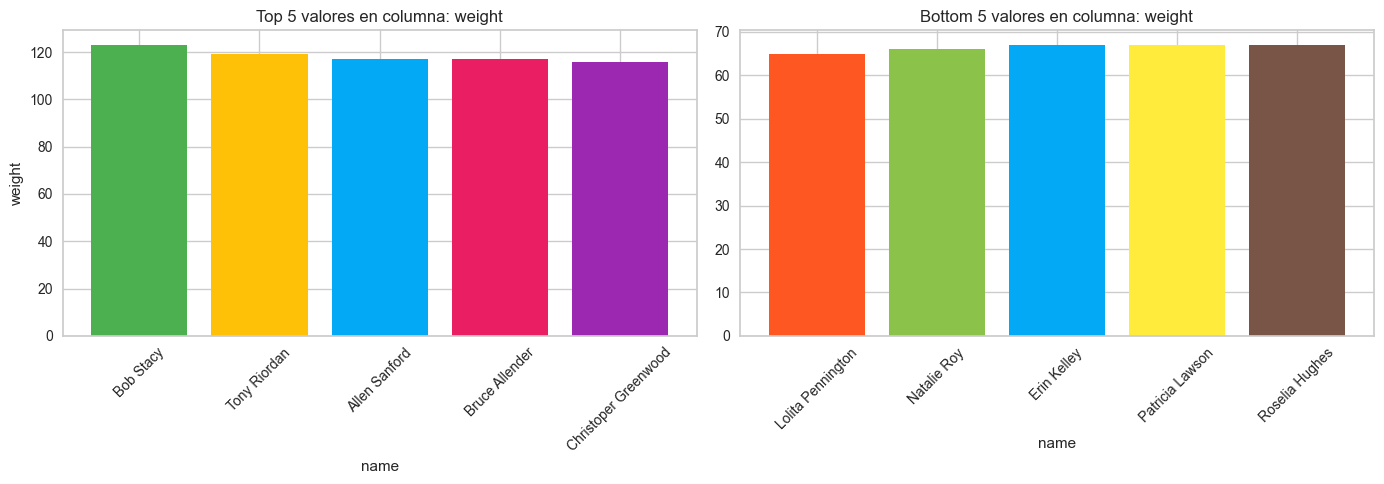

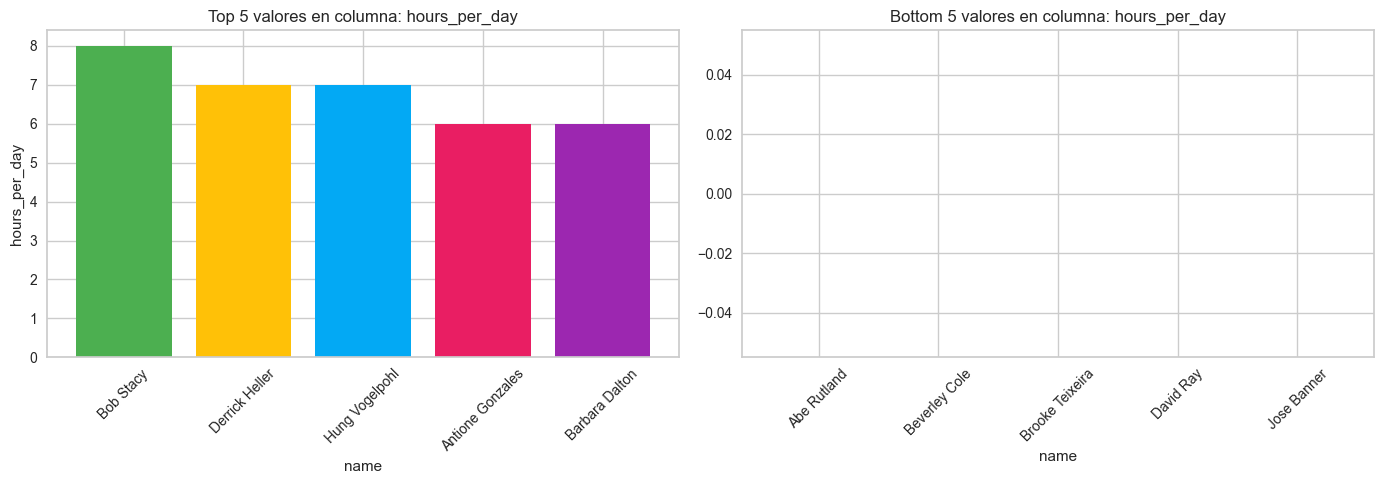

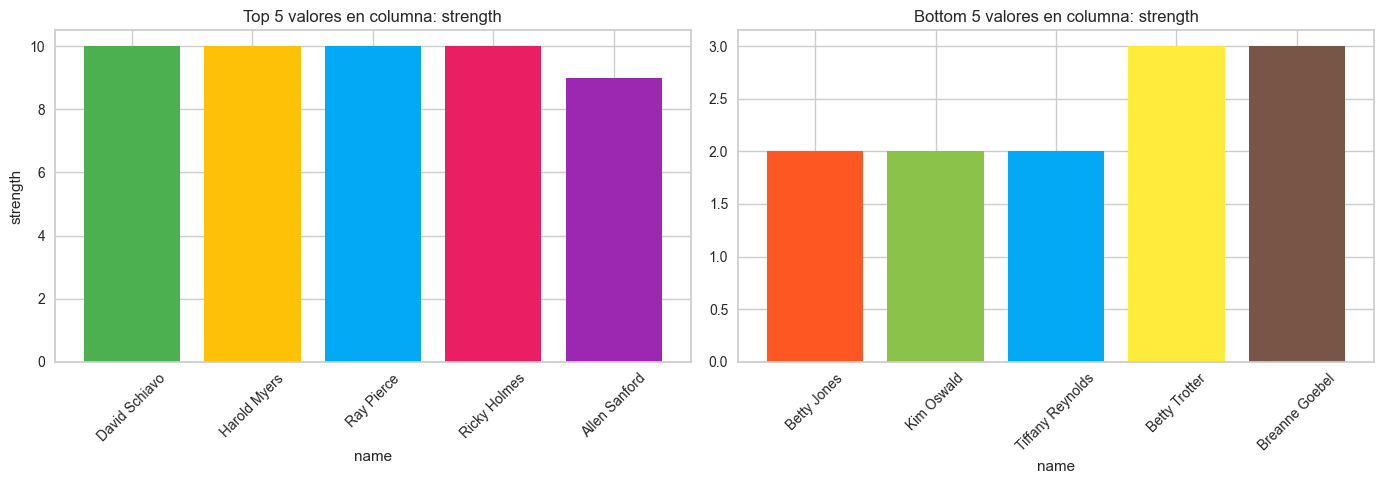

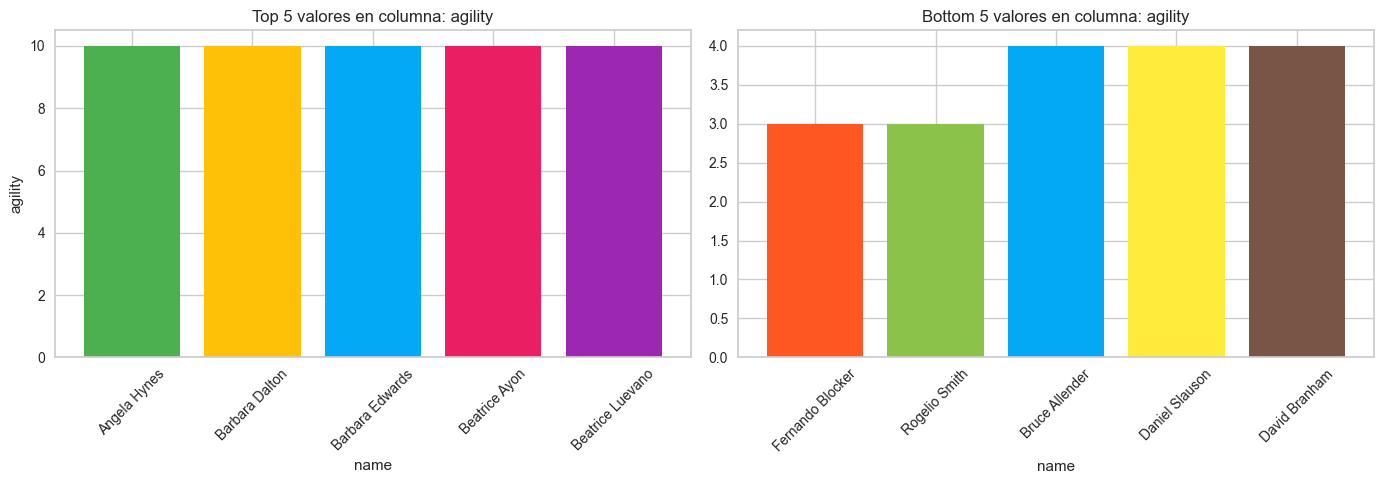

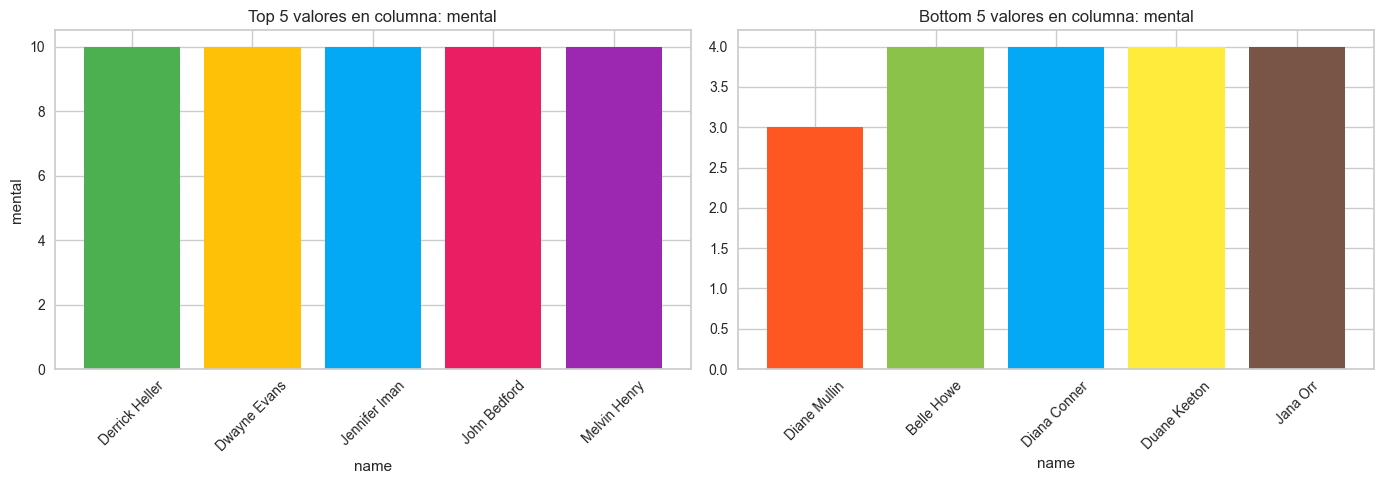

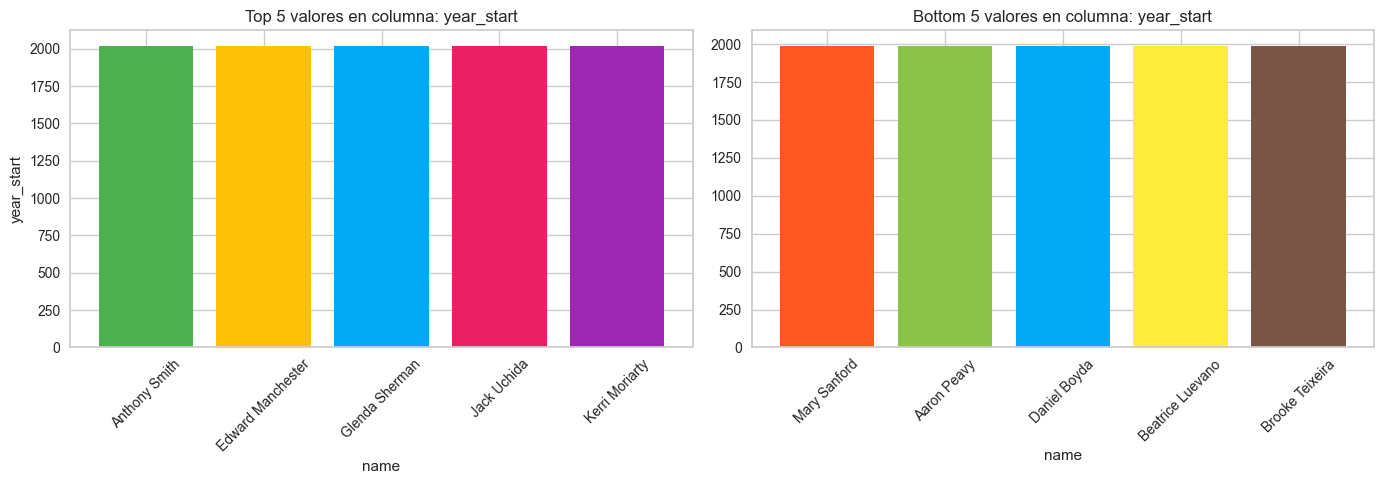

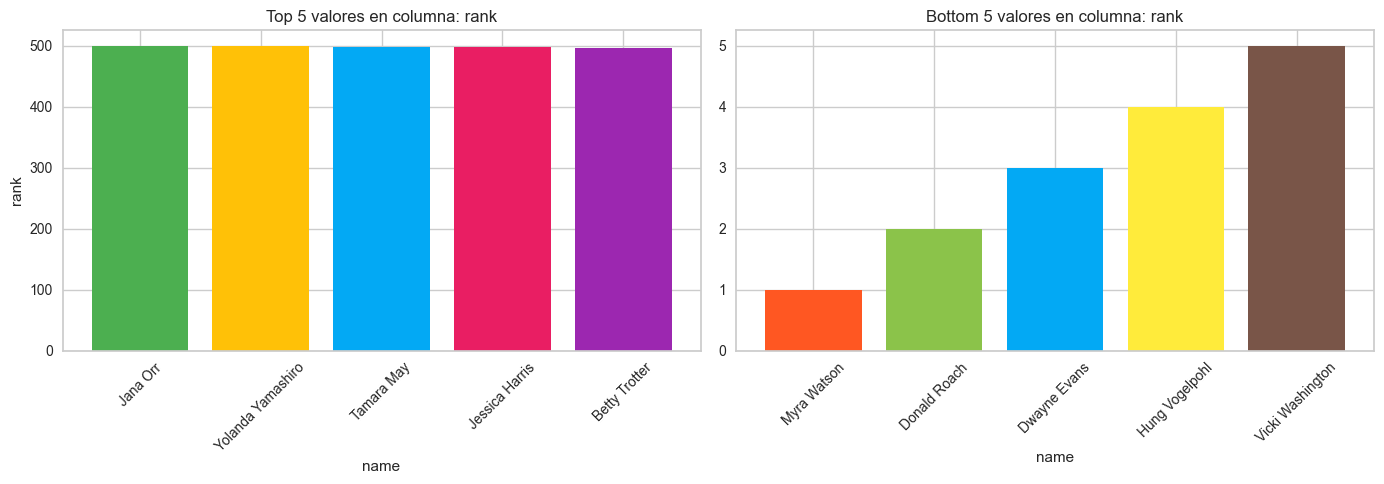

In [8]:
sp.plot_top5_and_bottom5(df,"name")

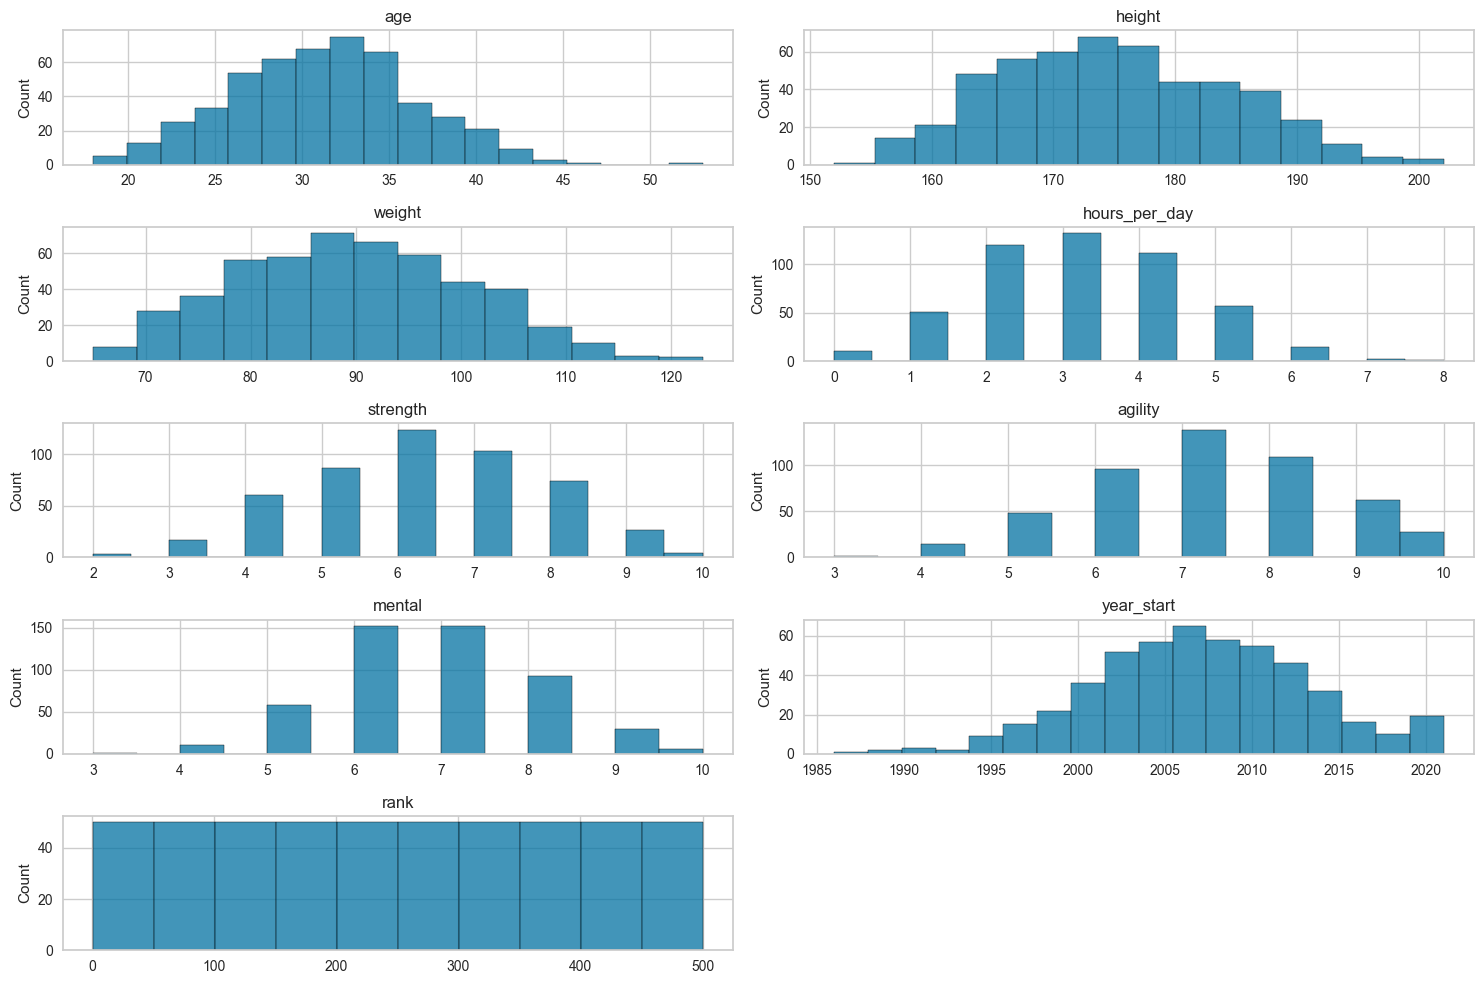

In [9]:
sp.plot_numericas(df)

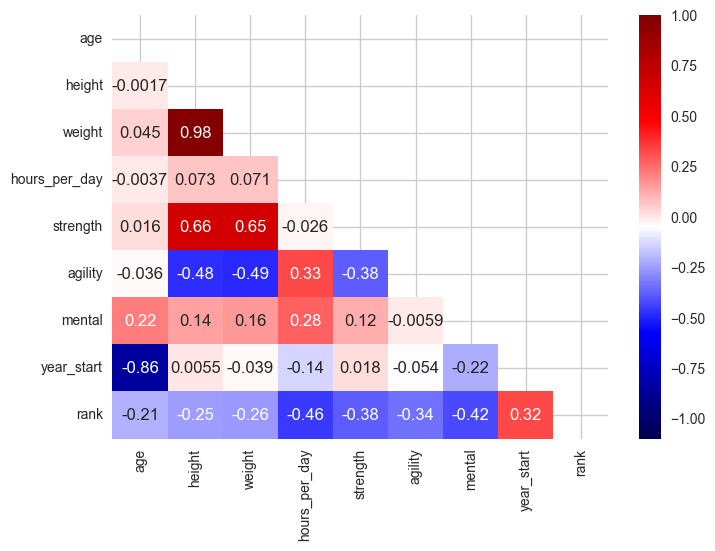

<Figure size 1000x1500 with 0 Axes>

In [10]:
sp.matriz_correlacion(df)

Comenzamos a gestionar nulos

In [11]:
# Vemos la cantidad actual que tenemos de nan
print(df.isnull().sum())

name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


In [12]:
# Vemos la cantidad total
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.shape

(500, 14)

### Gestion de Outiers

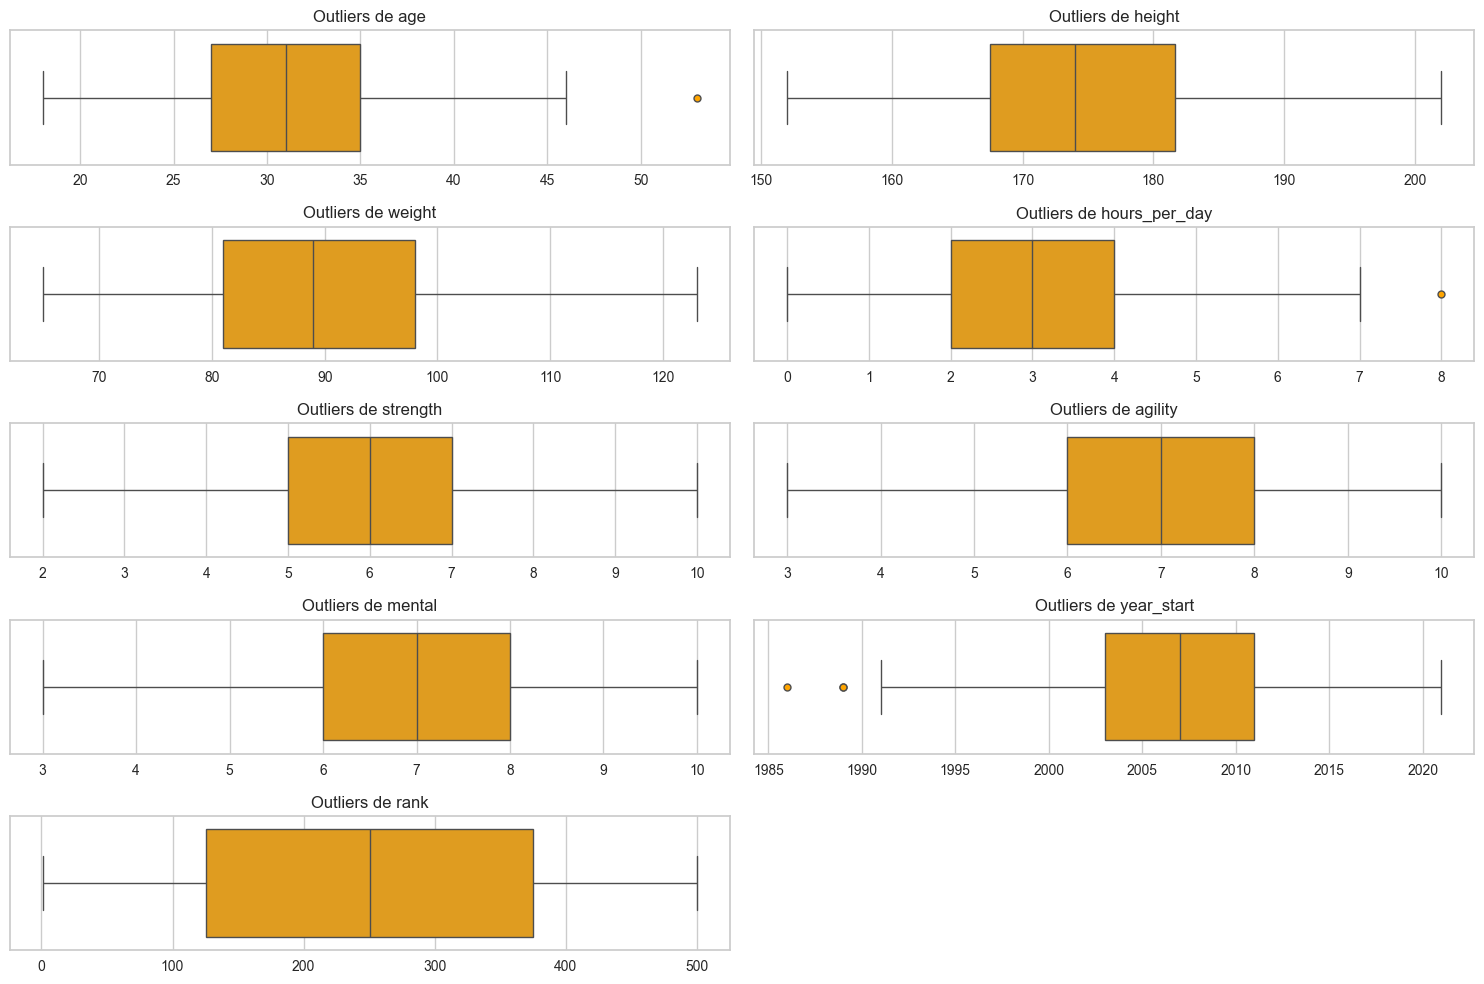

In [14]:
sp.detectar_outliers(df)

In [15]:
df.head(1)

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42


In [16]:
col_numericas=df.select_dtypes(include=np.number).columns
lista_vecinos=[5, 10, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

Aplicando LOF con diferentes parámetros: 100%|██████████| 12/12 [00:00<00:00, 38.14it/s]


In [17]:
df_lof.describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0
outliers_lof_5_0.01,500.0,0.980,0.199197,-1.0,1.00,1.0,1.000,1.0


In [18]:
col_numericas

Index(['age', 'height', 'weight', 'hours_per_day', 'strength', 'agility',
       'mental', 'year_start', 'rank'],
      dtype='object')

In [19]:
combinaciones_variables = list(combinations(col_numericas, 2))
columnas_hue = df_lof.filter(like="outlier").columns

In [20]:
# sp.scatterplot_outliers(df_lof,combinaciones_variables,columnas_hue)

In [21]:
cantidad = 8
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]
df_filtrado.shape

(5, 26)

In [22]:
df_filtrado.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_10_0.01,outliers_lof_10_0.05,outliers_lof_10_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
11,Allen Sanford,Male,26,201.5,Japan,117,"Judo, Karate",3,9,6,6,World Wrestling Entertainment,2015,179,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
50,Bob Stacy,Male,27,202.0,England,123,"Boxing, Judo, Kick-Boxing",8,7,7,8,Fight Zone Wrestling,2007,95,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
58,Bruce Allender,Male,24,198.5,France,117,Judo,3,9,4,7,Consejo Global de Lucha Libre,2015,373,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
170,Fernando Blocker,Male,25,195.5,France,114,Boxing,1,7,3,6,World Wrestling Entertainment,2015,459,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
324,Mary Sanford,Female,53,171.0,Japan,87,Judo,3,5,9,6,Fight Zone Wrestling,1986,232,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1


In [23]:
# Definir df_final 
df_final=df

In [24]:
# df final para crear modelos
df_final.shape

(500, 14)

In [25]:
df_final.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [26]:
columnas_categonum=sp.detector_columnas_categoricas(df_final,7)
columnas_categonum
df_final[columnas_categonum] = df_final[columnas_categonum].astype(object)

In [27]:
df_final=df_final.drop_duplicates()

In [28]:
df_final.describe()

,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,31.154000,174.864000,89.688000,3.064000,6.152000,7.148000,6.732000,2007.13000,250.500000
std,5.438514,9.468623,11.081889,1.375386,1.567741,1.455449,1.197934,6.32591,144.481833
min,18.000000,152.000000,65.000000,0.000000,2.000000,3.000000,3.000000,1986.00000,1.000000
25%,27.000000,167.500000,81.000000,2.000000,5.000000,6.000000,6.000000,2003.00000,125.750000
50%,31.000000,174.000000,89.000000,3.000000,6.000000,7.000000,7.000000,2007.00000,250.500000
75%,35.000000,181.625000,98.000000,4.000000,7.000000,8.000000,8.000000,2011.00000,375.250000
max,53.000000,202.000000,123.000000,8.000000,10.000000,10.000000,10.000000,2021.00000,500.000000


In [29]:
df_final.dtypes

name              object
gender            object
age                int64
height           float64
nationality       object
weight             int64
sports            object
hours_per_day      int64
strength           int64
agility            int64
mental             int64
federation        object
year_start         int64
rank               int64
dtype: object

# ESTANDARIZACIÓN

In [30]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [31]:
# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['age', 'height', 'weight', 'hours_per_day', 'strength', 'agility',
       'mental', 'year_start', 'rank'],
      dtype='object')

In [32]:
escalador_robust = RobustScaler()
suffix = "_robust"

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_robust = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df_rob = pd.concat([df_final, df_scaled_robust], axis=1)
df_rob.head(1)

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank,age_robust,height_robust,weight_robust,hours_per_day_robust,strength_robust,agility_robust,mental_robust,year_start_robust,rank_robust
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42,1.25,-0.637168,-0.411765,0.0,0.5,0.5,0.0,-2.25,-0.835671


In [33]:
escalador_minmax = MinMaxScaler()
suffix = "_minmax"

# Aplica el escalador a las columnas numéricas
datos_transf_minmax = escalador_minmax.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_minmax = pd.DataFrame(datos_transf_minmax, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df_min = pd.concat([df_final, df_scaled_minmax], axis=1)
df_min.head(1)

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank,age_minmax,height_minmax,weight_minmax,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,year_start_minmax,rank_minmax
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42,0.657143,0.26,0.293103,0.375,0.625,0.714286,0.571429,0.085714,0.082164


In [34]:
escalador_stds = StandardScaler()
suffix = "_stds"

# Aplica el escalador a las columnas numéricas
datos_transfr_stds = escalador_stds.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_stds = pd.DataFrame(datos_transfr_stds, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df_std = pd.concat([df_final, df_scaled_stds], axis=1)
df_std.head(1)

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank,age_stds,height_stds,weight_stds,hours_per_day_stds,strength_stds,agility_stds,mental_stds,year_start_stds,rank_stds
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42,1.812234,-1.0428,-0.694439,-0.046579,0.541447,0.585973,0.223943,-2.868861,-1.444533


In [35]:
df_list=[df_rob,df_std,df_min]

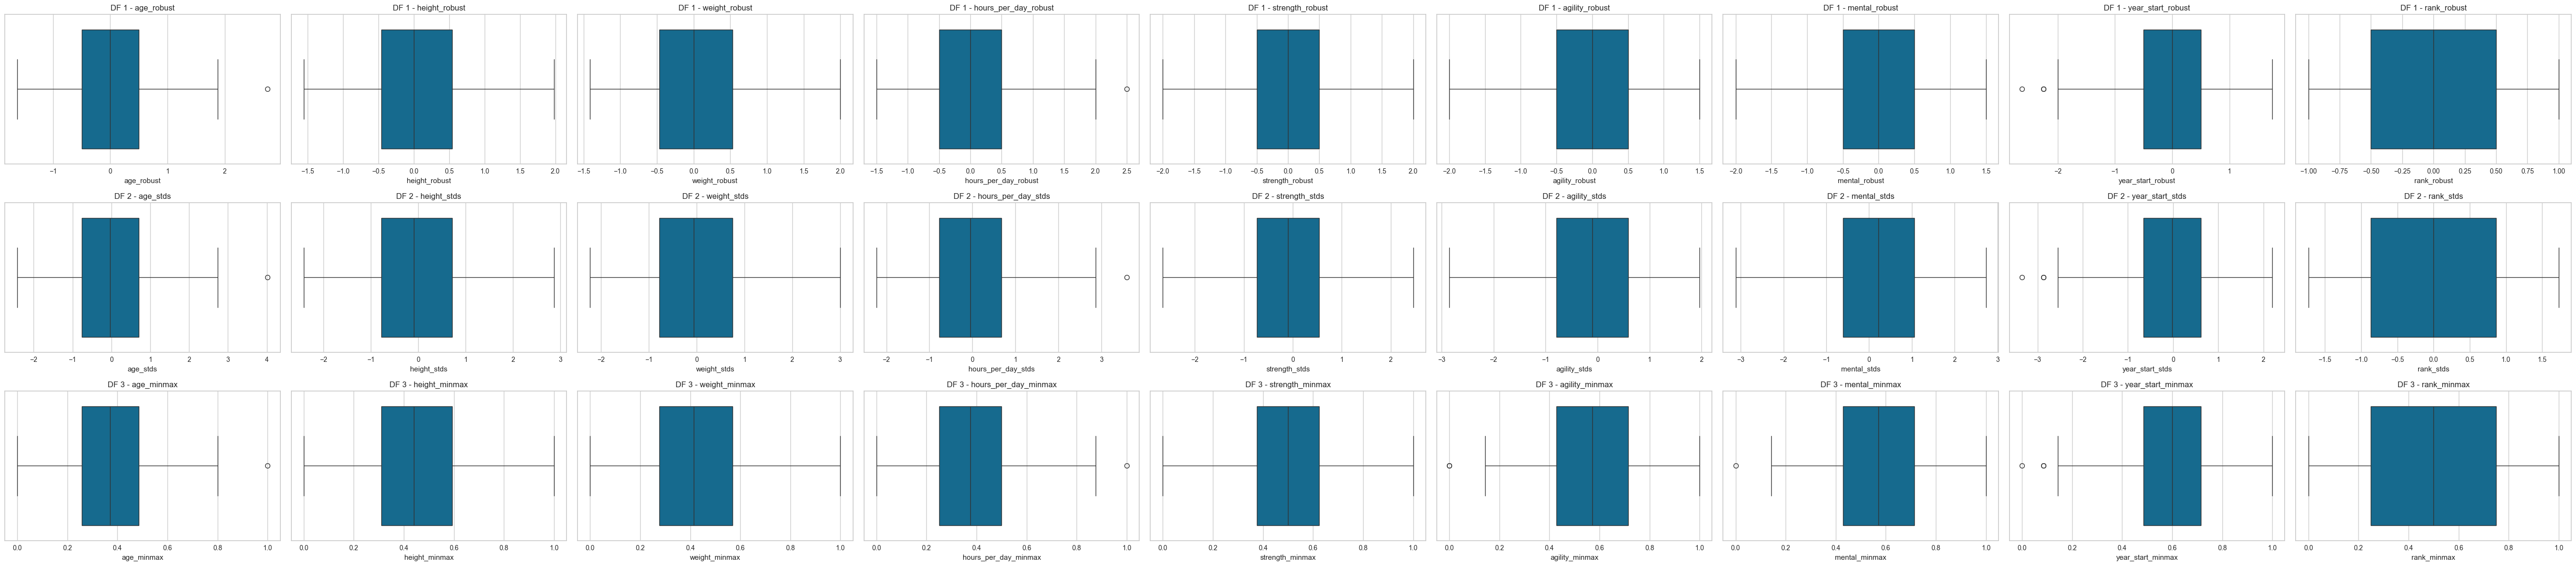

In [36]:
sp.generador_boxplots(df_list)

Una vez realizado la estandarizacion se opta por utilizar el metodo "Robust" para dar peso a los pocos outiers que hemos podido dejar en la muestra y que se tengan en cuenta en el modelo

In [37]:
df_final.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [38]:
df_estandarizado = pd.concat([df_final, df_scaled_robust], axis=1)
df_estandarizado=df_estandarizado.drop(columns=numeric_columns)

In [39]:
df_estandarizado.sample(5)

,name,gender,nationality,sports,federation,age_robust,height_robust,weight_robust,hours_per_day_robust,strength_robust,agility_robust,mental_robust,year_start_robust,rank_robust
13,Ana Smith,Female,France,"Judo, Karate",Fight Zone Wrestling,0.500,-0.424779,-0.588235,0.5,0.0,1.0,-0.5,-0.500,0.142285
485,Virgil Villalobos,Male,England,"Boxing, Kick-Boxing",Consejo Global de Lucha Libre,0.250,0.070796,0.117647,0.5,1.0,0.5,0.5,-0.875,-0.639279
357,Olivia Dyer,Female,USA,"Boxing, MMA",Consejo Global de Lucha Libre,0.125,-0.460177,-0.411765,0.5,0.0,-0.5,1.0,-0.500,-0.374749
254,Julio Fell,Male,Egypt,"Karate, MMA",Consejo Global de Lucha Libre,1.000,0.353982,0.411765,-0.5,0.5,-0.5,-0.5,-0.500,-0.262525
411,Rogelio Smith,Male,Australia,"Karate, MMA",Fight Zone Wrestling,1.125,0.991150,1.117647,-0.5,1.0,-2.0,1.0,-0.250,-0.474950


# Encoding

In [40]:
df_estandarizado.dtypes

name                     object
gender                   object
nationality              object
sports                   object
federation               object
age_robust              float64
height_robust           float64
weight_robust           float64
hours_per_day_robust    float64
strength_robust         float64
agility_robust          float64
mental_robust           float64
year_start_robust       float64
rank_robust             float64
dtype: object

In [41]:
lista_col_categ = df_estandarizado.select_dtypes(include="O").columns.tolist()
lista_col_categ

['name', 'gender', 'nationality', 'sports', 'federation']

In [42]:
lista_col_num = df_estandarizado.select_dtypes(include=np.number).columns.tolist()
lista_col_num

['age_robust',
 'height_robust',
 'weight_robust',
 'hours_per_day_robust',
 'strength_robust',
 'agility_robust',
 'mental_robust',
 'year_start_robust',
 'rank_robust']

In [43]:
df_estandarizado.head()

,name,gender,nationality,sports,federation,age_robust,height_robust,weight_robust,hours_per_day_robust,strength_robust,agility_robust,mental_robust,year_start_robust,rank_robust
0,Aaron Peavy,Female,England,"Boxing, MMA",Fight Zone Wrestling,1.250,-0.637168,-0.411765,0.0,0.5,0.5,0.0,-2.250,-0.835671
1,Abe Rutland,Male,Japan,Judo,World Wrestling Entertainment,0.625,0.778761,0.647059,-1.5,1.0,-1.0,1.0,-0.125,-0.358717
2,Adrian Quinn,Male,Japan,Karate,World Wrestling Entertainment,-0.250,0.318584,0.235294,0.5,1.0,0.5,0.0,0.625,-0.390782
3,Alan Beckham,Male,Japan,Judo,Fight Zone Wrestling,1.000,0.955752,1.058824,0.0,0.5,-0.5,0.5,-0.500,0.006012
4,Albertha Rodriguez,Female,USA,MMA,Consejo Global de Lucha Libre,-0.250,-1.132743,-1.000000,-1.0,-0.5,0.0,0.0,0.625,0.438878


In [44]:
df_estandarizado.nunique()

name                    500
gender                    2
nationality               8
sports                   31
federation                3
age_robust               30
height_robust            83
weight_robust            53
hours_per_day_robust      9
strength_robust           9
agility_robust            8
mental_robust             8
year_start_robust        33
rank_robust             500
dtype: int64

In [45]:
df_estandarizado.dtypes

name                     object
gender                   object
nationality              object
sports                   object
federation               object
age_robust              float64
height_robust           float64
weight_robust           float64
hours_per_day_robust    float64
strength_robust         float64
agility_robust          float64
mental_robust           float64
year_start_robust       float64
rank_robust             float64
dtype: object

In [46]:
df_estandarizado=df_estandarizado.drop(columns="sports")

In [47]:
columnas_categoricas=["gender","nationality","federation"]

In [48]:
df_encoding=sp.frequency_encoding(df_estandarizado, columnas_categoricas)

Mapeos de frecuencia guardados en: ../transformers/freq_mappings.pkl


In [53]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'feature1': [1.0, 2.0, 3.0, 4.0], 'feature2': [4.0, 5.0, 6.0, 7.0]}
df = pd.DataFrame(data)

# Crear una instancia de la clase Clustering
clustering = sc.Clustering(df)

# 1. Determinar el número óptimo de clusters con KMeans usando KElbowVisualizer
print("Ejecutando KMeans con KElbowVisualizer...")
clustering.sacar_clusters_kmeans(n_clusters=(2, 5))  # Visualizará el gráfico de codo
print("KMeans con KElbowVisualizer finalizado.\n")

# 2. Aplicar KMeans con un número definido de clusters
print("Ejecutando KMeans con 3 clusters...")
df_kmeans, labels_kmeans = clustering.modelo_kmeans(df.copy(), num_clusters=3)
print("KMeans finalizado. Etiquetas de clusters añadidas al DataFrame.")
print(df_kmeans.head(), "\n")

# 3. Generar y visualizar dendrogramas
print("Generando dendrogramas...")
clustering.visualizar_dendrogramas(["average", "complete", "ward"])
print("Dendrogramas generados.\n")

# 4. Aplicar clustering aglomerativo
print("Ejecutando clustering aglomerativo con 3 clusters y método 'ward'...")
df_aglomerativo = clustering.modelo_aglomerativo(
    num_clusters=3,
    metodo_distancias="ward",
    dataframe_original=df.copy()
)
print("Clustering aglomerativo finalizado. Etiquetas de clusters añadidas al DataFrame.")
print(df_aglomerativo.head(), "\n")

# 5. Aplicar clustering divisivo
print("Ejecutando clustering divisivo...")
df_divisivo = clustering.modelo_divisivo(df.copy(), threshold=0.5, max_clusters=3)
print("Clustering divisivo finalizado. Etiquetas de clusters añadidas al DataFrame.")
print(df_divisivo.head(), "\n")

# 6. Aplicar clustering espectral
print("Ejecutando clustering espectral con 3 clusters...")
df_espectral = clustering.modelo_espectral(df.copy(), n_clusters=3, assign_labels='kmeans')
print("Clustering espectral finalizado. Etiquetas de clusters añadidas al DataFrame.")
print(df_espectral.head(), "\n")

# 7. Aplicar DBSCAN
print("Ejecutando DBSCAN...")
df_dbscan = clustering.modelo_dbscan(
    dataframe_original=df.copy(),
    eps_values=[0.5, 1.0, 1.5],
    min_samples_values=[2, 3]
)
print("DBSCAN finalizado. Etiquetas de clusters añadidas al DataFrame.")
print(df_dbscan.head(), "\n")

# Resumen de todos los DataFrames generados
print("Clustering completado. Resumen final:")
print("KMeans:\n", df_kmeans.head())
print("Aglomerativo:\n", df_aglomerativo.head())
print("Divisivo:\n", df_divisivo.head())
print("Espectral:\n", df_espectral.head())
print("DBSCAN:\n", df_dbscan.head())


Ejecutando KMeans con KElbowVisualizer...


ValueError: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)